In [ ]:
#Import Statements
import pandas as pd
import pickle
from pandas import DataFrame, Series
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model,naive_bayes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split #JD
from sklearn import svm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

In [20]:
#Uploading Raw Data
df = pd.read_csv('/content/drive/My Drive/Machine_Learning/Rerun_FBwhiff.csv',low_memory=False) #2022 data
dft = pd.read_csv('/content/drive/My Drive/Machine_Learning/Fastball_STUFF_2023.csv',low_memory=False) #2022 data

In [4]:
#Dropping Rows with Blanks
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()
#HPS

In [ ]:
#Correlation Matrix
df.corr('pearson')

In [5]:
#Setting Features / Parameters
X = df[['RelSpeed','RelHeight','ABS_RELSIDE','Extension','Differential_Break']]
y = df["Whiff_Bool"]

In [6]:
#Splitting Up Data into Training and Testing
train_test_split(X,y,test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
#Training the model 
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
#Fastball Coef
reg.coef_

In [ ]:
#Fastball Intercept
reg.intercept_

In [ ]:
#Checking Model Score
reg.score(X_test, y_test)

In [14]:
#Setting Variables to Check for Variance Inflation
X_variables=df[['RelSpeed','RelHeight','ABS_RELSIDE','Extension','Differential_Break']]

In [15]:
#Checking for Variance Inflation
from re import X
vif_data=pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i)for i in range(len(X_variables.columns))]
#HPS


In [ ]:
#Printing Variance Inflation Table
print (vif_data)

In [ ]:
#Inputs for the xWhiff Equation
name = input("Enter your name: ")
RelSpeed = float(input("How fast was the Pitch?"))
RelHeight = float(input("What was the Release Height?"))
ABS_RELSIDE = float(input("What is was the Side Release Absolute Value?"))
Extension = float(input("What is was the Extension?"))
Differential_Break = float(input("What is was the Differential Break (Induced Vertical Break - Horizontal Break) ? "))
#HPS

In [ ]:
#xWhiff based on reg.coef_ and reg.intercept_
xWhiff_FourSeam = (RelSpeed * 0.01600734) + (RelHeight * -0.02879908) + (ABS_RELSIDE * 0.00697568) + (Extension * -0.01225956) + (Differential_Break * .00622116 ) -1.0419881250519432

In [ ]:
#Constant From Testing Data AVG xWHIFF
FourSeam_xWhiff_Constant=.24566

In [ ]:
#Stuff Equation
Stuff_plus_FourSeam=(xWhiff_FourSeam/FourSeam_xWhiff_Constant)*100

In [ ]:
#Print Statment
print(name, "Stuff+:",round(Stuff_plus_FourSeam,2))


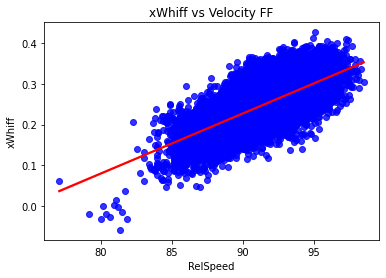

In [24]:
#xWhiff Compared to Velocity
plot = sns.regplot(y='xWhiff', x='RelSpeed',data=dft,
                scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title='xWhiff vs Velocity FF')

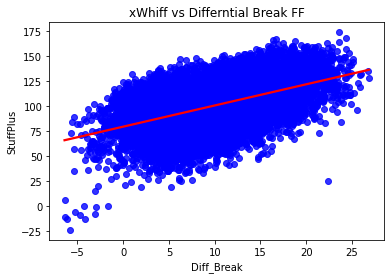

In [25]:
#xWhiff Compared to Differential Break (ivb - hb)
plot = sns.regplot(y='StuffPlus', x='Diff_Break',data=dft,
                scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title='xWhiff vs Differntial Break FF')